In [44]:
import pandas as pd
import scipy
import statsmodels
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import math

In [45]:
wine_data = pd.read_csv("data/wine.data")

# 1. Deskriptiv statistik

In [46]:
grape_1_Alcohol = wine_data["Alcohol"].loc[1]
grape_2_Alcohol = wine_data["Alcohol"].loc[2]
grape_3_Alcohol = wine_data["Alcohol"].loc[3]

grape_1_Alc_mean = grape_1_Alcohol.mean()
grape_2_Alc_mean = grape_2_Alcohol.mean()
grape_3_Alc_mean = grape_3_Alcohol.mean()

grape_1_standard_deviation = grape_1_Alcohol.std()
grape_2_standard_deviation = grape_2_Alcohol.std()
grape_3_standard_deviation = grape_3_Alcohol.std()

print(f"Druva 1: medelvärde = {grape_1_Alc_mean} standard avvikelse = {grape_1_standard_deviation}")
print(f"Druva 2: medelvärde = {grape_2_Alc_mean} standard avvikelse = {grape_2_standard_deviation}")
print(f"Druva 3: medelvärde = {grape_3_Alc_mean} standard avvikelse = {grape_3_standard_deviation}")

Druva 1: medelvärde = 13.744745762711865 standard avvikelse = 0.46212535966129437
Druva 2: medelvärde = 12.278732394366195 standard avvikelse = 0.5379642302964676
Druva 3: medelvärde = 13.153750000000002 standard avvikelse = 0.5302413139918747


Summan av alla x där x är en alkohol halt i tabelen för en specific druva delat på antalet x utycket som n
$$ \overline x = \frac {\sum x } n$$
___
Roten av summan av all x där x är en alkohol halt i tabelen för en specifik druva plus medlevärdet för en druv sort upphöjt med 2, delat på n där n är antalet rader för en specifik druva.
$$ s = \sqrt{\frac{\sum(x + \overline x)^2} n} $$

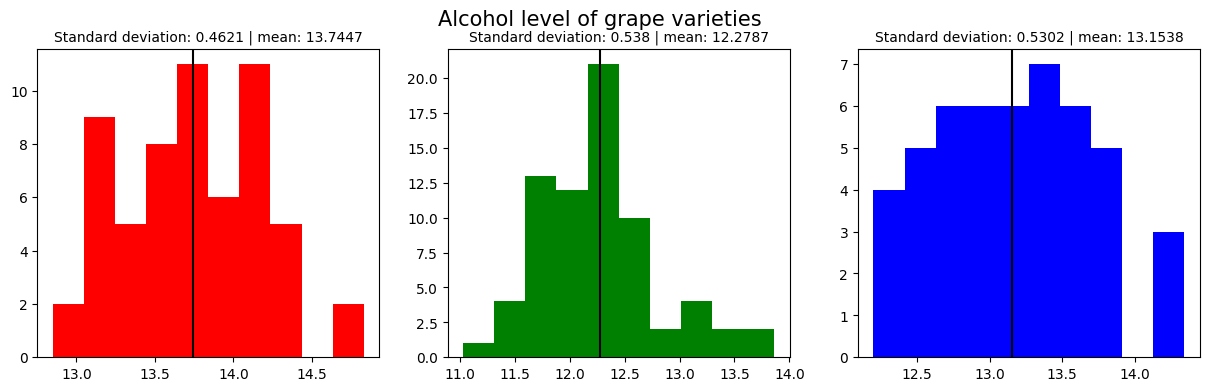

In [47]:
fig, axes = plt.subplots(1,3 , dpi = 100, figsize = (15,4))
axes[0].hist(grape_1_Alcohol, color = "r")
axes[0].axvline(grape_1_Alc_mean, color = "black")
axes[0].set_title(f"Standard deviation: {round(grape_1_standard_deviation, 4)} | mean: {round(grape_1_Alc_mean, 4)}", fontsize = 10)

axes[1].hist(grape_2_Alcohol, color = "g")
axes[1].axvline(grape_2_Alc_mean, color = "black")
axes[1].set_title(f"Standard deviation: {round(grape_2_standard_deviation, 4)} | mean: {round(grape_2_Alc_mean, 4)}", fontsize = 10)

axes[2].hist(grape_3_Alcohol, color = "b")
axes[2].axvline(grape_3_Alc_mean, color = "black")
axes[2].set_title(f"Standard deviation: {round(grape_3_standard_deviation, 4)} | mean: {round(grape_3_Alc_mean, 4)}", fontsize = 10)
plt.suptitle("Alcohol level of grape varieties", fontsize = 15);

Alkohol halten för de olika druvorna verkar ha en underliggande fördelning. Då majoriteten av värden ligger grupperade i mitten med mindre värden som ligger längre ut från mitten.

Druva 1 (Färg: Röd) verkar ha en normalfördelning dock inte en stark då den har toppar ut på svansarna där de är lika med medelvärdet.

Druva 2 (Färg: Gröm) verkar ha en ganska bra normalfördelning då den inte har nårgra toppar som matchar till medelvärdet.

Druva 3 (Färg: Blå) verkar inte ha en bra normal fördelnign då den är väldigt jämnlängs hela.

# Hypotestest och konfidensintervall

## 2

In [63]:
rnd.seed(2023)

winedata_grape2 = wine_data.loc[2].reset_index().rename({"index": "Grape Variant"}, axis = 1)

index_smaple = []

while True:
    rand_value = rnd.randint(winedata_grape2.index.min(), winedata_grape2.index.max())
    if rand_value not in index_smaple:
        index_smaple.append(rand_value)

    if len(index_smaple) == 15:
        break

wine_data_grape_2_samples = winedata_grape2.loc[index_smaple].reset_index(drop = True)

H0 = 1.75 kommer att ligga inom konfidensintervallet  |  H0 <= 1.75

H1 = 1.75 kommer att ligga utan för konfidensintervallet | H0 > 1.75

$$ \overline x \underline + t_ {\frac {a} 2, n-1}  {s} / {\sqrt {n}} $$

signifikansnivå = 0.05

In [64]:
sample_data = wine_data_grape_2_samples["Proanthocyanins"]
sample_mean = sample_data.mean()
sample_stan_dev = sample_data.std()

print(f"mean = {sample_mean} | stan_dev = {sample_stan_dev} | n = {len(sample_data)} | {math.sqrt(len(sample_data))}")
print((sample_mean - 1.75) / (sample_stan_dev / math.sqrt(len(sample_data))))

mean = 1.614 | stan_dev = 0.48966169079127625 | n = 15 | 3.872983346207417
-1.0756931673234185


Efter som att vi får en test statistika på -1.076 och vårt kritiska värd för 0.05 kommer att bli -1.761. Med tanke på att vårt kritiska värde är mer extremt än våran test statistika kommer H0 ej att förkastas.

## 3

In [50]:
rnd.seed(2023)

ex3_winedata_grape2 = wine_data.loc[2].reset_index().rename({"index": "Grape Variant"}, axis = 1)
ex3_winedata_grape3 = wine_data.loc[3].reset_index().rename({"index": "Grape Variant"}, axis = 1)

index_sample_grape2 = []
index_sample_grape3 = []

while True:
    rand_value = rnd.randint(ex3_winedata_grape2.index.min(), ex3_winedata_grape2.index.max())
    if rand_value not in index_smaple:
        index_sample_grape2.append(rand_value)

    if len(index_sample_grape2) == 20:
        break

while True:
    rand_value = rnd.randint(ex3_winedata_grape3.index.min(), ex3_winedata_grape3.index.max())
    if rand_value not in index_smaple:
        index_sample_grape3.append(rand_value)

    if len(index_sample_grape3) == 20:
        break

ex2_wine_data_grape2_sample = ex3_winedata_grape2.loc[index_sample_grape2].reset_index(drop = True)
ex3_wine_data_grape3_sample = ex3_winedata_grape3.loc[index_sample_grape3].reset_index(drop = True)

Konfidensintervall när standard avvikelsen är okänd:
$$ (\overline x_ 1 - \overline x_ 2) \underline + t_ {a/2, df} \sqrt {\frac {S_1 ^2} n_1 + \frac {S_2 ^2} n_2} $$

Formeln för att få fram t värdet:
$$ Värdet \hspace{1mm} för \hspace{1mm} t \hspace{1mm} läser \hspace{1mm} man \hspace{1mm} ut \hspace{1mm} ur \hspace{1mm} tabelen $$

Formeln för att få fram stickprovsstandardavvikelsen görs för båda stickproven:
$$ s = \sqrt {\frac {\sum (x - \overline x) ^2} {n - 1}} $$

Formeln för att få fram frihetsgraderna som används i formeln för konfidensintervallet:
$$ df = \frac {(\frac{(s_1 ^2)} n_1 \hspace{1mm} + \hspace{1mm} \frac{(s_2 ^2)}n_2) ^2} {\frac{(s_1^2/n_1) ^2} {(n_1-1)} \hspace{1mm} + \hspace{1mm} \frac{(s_2^2/n_2)^2} {(n_2 -1)}} $$

In [85]:
mean_1 = ex2_wine_data_grape2_sample["Total phenols"].mean()
mean_2 = ex3_wine_data_grape3_sample["Total phenols"].mean()
stan_dev_1 = ex2_wine_data_grape2_sample["Total phenols"].std()
stan_dev_2 = ex3_wine_data_grape3_sample["Total phenols"].std()
n_1 = len(ex2_wine_data_grape2_sample["Total phenols"])
n_2 = len(ex3_wine_data_grape3_sample["Total phenols"])

df = ((((stan_dev_1**2) / n_1) + ((stan_dev_2**2) / n_2))**2) / ((((stan_dev_1**2) / n_1)**2) / n_1 - 1) + ((((stan_dev_2**2)/n_2)**2) /n_2 - 1)

t_stat = 

-1.0004125201238392


In [72]:
sample_data_grape2 = ex2_wine_data_grape2_sample["Total phenols"]
grape2_sample_mean = sample_data_grape2.mean()
grape2_sample_stan_dev = scipy.stats.tstd(sample_data)

sample_data_grape3 = ex3_wine_data_grape3_sample["Total phenols"]
grape3_sample_mean = sample_data_grape3.mean()
grape3_sample_stan_dev = scipy.stats.tstd(sample_data)

print(scipy.stats.ttest_rel(sample_data_grape2, sample_data_grape3))
print(scipy.stats.ttest_rel(sample_data_grape2, sample_data_grape3).confidence_interval(confidence_level=0.95))

TtestResult(statistic=4.259627672045885, pvalue=0.0004236133958334857, df=19)
ConfidenceInterval(low=0.2960266489346614, high=0.8679733510653389)


För att det p värdet som räknades ut från vårat stickprov hamnar utanför det konfidence intevallet vi satte upp kommer vi att förkastas nollhypotesen.

Om man ökar stickprovsstorleken kommer konfidence intervallet att bli smalare, konfidence intervallet blir bredare när vi minskar på stickprovsstorleken. För att med större stickprov kommer vår fel marginal bli mindre och om vi minskar stickprovstorleken kommer vår fel marginal bli större

Om man minskar konfidence graden kommer konfidence intevallet man sätter upp var smalare och om man ökar konfidence graden kommer konfidence intevallet att bli breddare.

## 4

In [52]:
rnd.seed(2023)

ex4_winedata_grape2 = wine_data.loc[2].reset_index().rename({"index": "Grape Variant"}, axis = 1)
ex4_winedata_grape3 = wine_data.loc[3].reset_index().rename({"index": "Grape Variant"}, axis = 1)

index_sample_grape2 = []
index_sample_grape3 = []

while True:
    rand_value = rnd.randint(ex4_winedata_grape2.index.min(), ex4_winedata_grape2.index.max())
    if rand_value not in index_smaple:
        index_sample_grape2.append(rand_value)

    if len(index_sample_grape2) == 25:
        break

while True:
    rand_value = rnd.randint(ex4_winedata_grape3.index.min(), ex4_winedata_grape3.index.max())
    if rand_value not in index_smaple:
        index_sample_grape3.append(rand_value)

    if len(index_sample_grape3) == 25:
        break

ex4_wine_data_grape2_sample = ex4_winedata_grape2.loc[index_sample_grape2].reset_index(drop = True)
ex4_wine_data_grape3_sample = ex4_winedata_grape3.loc[index_sample_grape3].reset_index(drop = True)

ex4_wine_data_grape2_above_20 = ex4_wine_data_grape2_sample[ex4_wine_data_grape2_sample["Alcalinity of ash"] > 20].reset_index(drop = True)
ex4_wine_data_grape3_above_20 = ex4_wine_data_grape3_sample[ex4_wine_data_grape3_sample["Alcalinity of ash"] > 20].reset_index(drop = True)

Nollhypotesen blir för denna uppgift att andelen druvor med alkaliniteten över 20 för druva 2 inte kommer att vara lika med andelen druvor med Alkaliniteten över 20 för druva 3.
$$ H0 = Alcalinty_1 = Alcalinity_2 $$
Alternativhypotesen blir för denna uppgiften att andelen druvor med alkaliniteten över 20 för druva 2 kommer att vara like med andelen druvor med alkaliniteten över 20 för druva 3
$$ HA = Alcalinty_1 \neq Alcalinity_2 $$

Formlerna som utnyttjas i testet:
$$ Z = \frac {\hat {p_1} - \hat {p_2}} {\sqrt{\hat {p}(1-\hat {p})(\frac {1}{n_1} + \frac{1}{n_2})}},\hspace{4mm} \hat{p} = \frac {(n_1\hat{p_1} + n_2\hat{p_2})} {(n_1 + n_2)}$$

In [69]:
from statsmodels.stats.api import proportions_ztest

grape2_above_20_count = len(ex4_wine_data_grape2_above_20)
grape3_above_20_count = len(ex4_wine_data_grape3_above_20)
grape2_sample_len = len(ex4_wine_data_grape2_sample)
grape3_sample_len = len(ex4_wine_data_grape3_sample)

z_value, p_value = proportions_ztest([grape2_above_20_count, grape3_above_20_count], [grape2_sample_len, grape3_sample_len], alternative = "two-sided")
print(round(z_value, 2), round(p_value, 5))

-0.57 0.5713


$$ P(z\underline < -2.85) = 0.0022$$
Detta kommer att bli våran signifikans nivå för denna ut räkningen. Med tanke på att vårat p värde ligger över signifikans nivån kommer vi ej att förkasta H0. 

# Korrelation och Regression

## 5

In [54]:
df_wine = wine_data.reset_index().rename({"index": "Grape Variant"}, axis = 1)
corr_plot = df_wine.corr()
corr_plot

,Grape Variant,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Grape Variant,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


Formeln för stickprovskorrelation:
$$ r = \frac{(n-1)s_{xy}} {\sqrt{\sum_{i=1}^n(x_i-\overline x)^2 \sum_{i=1}^n(y_i-\overline x)^2}}$$

Formeln för Sxy som är med i formeln ovan:
$$ S_{xy} = \frac{\sum_{i=1}^n(x_i - \overline x)(y_i - \overline y)} {n-1}$$

Valda parametrar: Total phenols och Flavanoids.

## 6

Valda parametrar för regressions plot är Total phenols och Flavanoids

In [55]:
import statsmodels.api as sm

regression_data = wine_data.reset_index().rename({"index": "Grape Variant"}, axis = 1)
regression_data = regression_data[["Grape Variant", "Total phenols", "Flavanoids"]]
regression_data_grape1 = regression_data[regression_data["Grape Variant"] == 1].reset_index(drop = True)
regression_data_grape2 = regression_data[regression_data["Grape Variant"] == 2].reset_index(drop = True)
regression_data_grape3 = regression_data[regression_data["Grape Variant"] == 3].reset_index(drop = True)

### Regression druva 1

In [56]:
grape1_x = regression_data_grape1["Total phenols"].to_list()
grape1_y = regression_data_grape1["Flavanoids"].to_list()

result_grape1 = sm.OLS(grape1_y, grape1_x).fit()
print(result_grape1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              9272.
Date:                Thu, 15 Jun 2023   Prob (F-statistic):                    1.08e-65
Time:                        10:26:13   Log-Likelihood:                          1.1766
No. Observations:                  59   AIC:                                    -0.3532
Df Residuals:                      58   BIC:                                      1.724
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

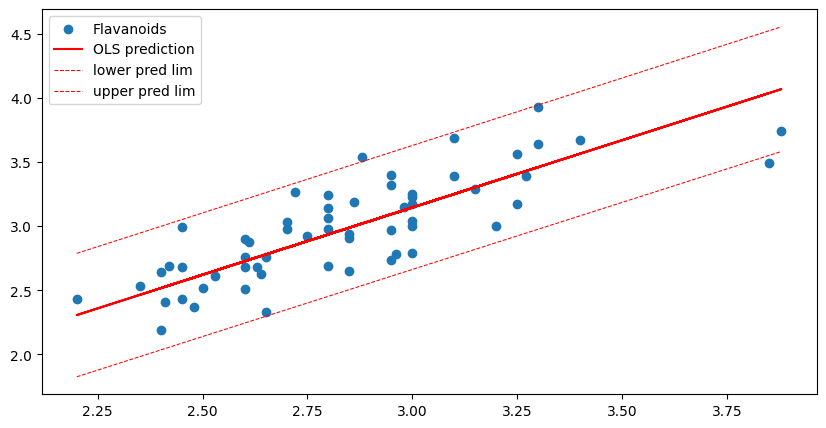

In [57]:
predictions = result_grape1.get_prediction(regression_data_grape1["Total phenols"])

frame=predictions.summary_frame(alpha=0.05)
ypred=frame['mean']

frame[['obs_ci_lower','obs_ci_upper']]

order = np.argsort(regression_data_grape1["Total phenols"])
xs = np.array(regression_data_grape1["Total phenols"])[order]

fig, ax = plt.subplots(figsize=(10,5))

plt.scatter(data=regression_data_grape1, x='Total phenols', y='Flavanoids')
ax.plot(regression_data_grape1["Total phenols"], ypred, "r", label="OLS prediction")

order = np.argsort(regression_data_grape1["Total phenols"])
x = np.array(regression_data_grape1["Total phenols"])[order]
lower = np.array(frame['obs_ci_lower'])[order]
upper = np.array(frame['obs_ci_upper'])[order]

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)


ax.legend(loc="best")
plt.show()

### Regression druva 2

In [58]:
grape2_x = regression_data_grape2["Total phenols"].to_list()
grape2_y = regression_data_grape2["Flavanoids"].to_list()

result_grape2 = sm.OLS(grape2_y, grape2_x).fit()
print(result_grape2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1611.
Date:                Thu, 15 Jun 2023   Prob (F-statistic):                    4.68e-50
Time:                        10:26:14   Log-Likelihood:                         -43.743
No. Observations:                  71   AIC:                                      89.49
Df Residuals:                      70   BIC:                                      91.75
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

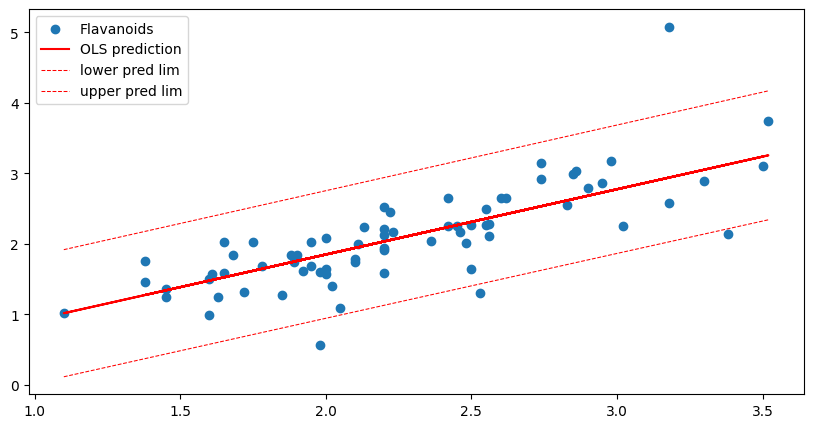

In [59]:
predictions = result_grape2.get_prediction(regression_data_grape2["Total phenols"])

frame=predictions.summary_frame(alpha=0.05)
ypred=frame['mean']

frame[['obs_ci_lower','obs_ci_upper']]

order = np.argsort(regression_data_grape2["Total phenols"])
xs = np.array(regression_data_grape2["Total phenols"])[order]

fig, ax = plt.subplots(figsize=(10,5))

plt.scatter(data=regression_data_grape2, x='Total phenols', y='Flavanoids')
ax.plot(regression_data_grape2["Total phenols"], ypred, "r", label="OLS prediction")

order = np.argsort(regression_data_grape2["Total phenols"])
x = np.array(regression_data_grape2["Total phenols"])[order]
lower = np.array(frame['obs_ci_lower'])[order]
upper = np.array(frame['obs_ci_upper'])[order]

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)


ax.legend(loc="best")
plt.show()

### Regression druva 3

In [60]:
grape3_x = regression_data_grape3["Total phenols"].to_list()
grape3_y = regression_data_grape3["Flavanoids"].to_list()

result_grape3 = sm.OLS(grape3_y, grape3_x).fit()
print(result_grape3.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                              323.4
Date:                Thu, 15 Jun 2023   Prob (F-statistic):                    1.05e-22
Time:                        10:26:15   Log-Likelihood:                         -9.8295
No. Observations:                  48   AIC:                                      21.66
Df Residuals:                      47   BIC:                                      23.53
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

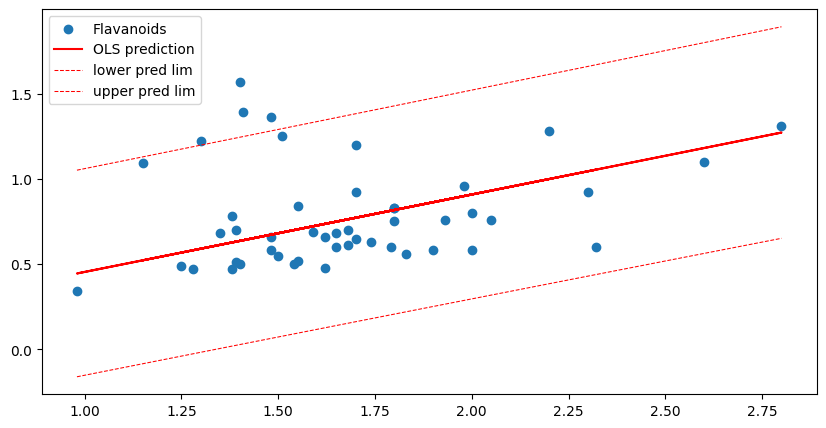

In [61]:
predictions = result_grape3.get_prediction(regression_data_grape3["Total phenols"])

frame=predictions.summary_frame(alpha=0.05)
ypred=frame['mean']

frame[['obs_ci_lower','obs_ci_upper']]

order = np.argsort(regression_data_grape3["Total phenols"])
xs = np.array(regression_data_grape3["Total phenols"])[order]

fig, ax = plt.subplots(figsize=(10,5))

plt.scatter(data=regression_data_grape3, x='Total phenols', y='Flavanoids')
ax.plot(regression_data_grape3["Total phenols"], ypred, "r", label="OLS prediction")

order = np.argsort(regression_data_grape3["Total phenols"])
x = np.array(regression_data_grape3["Total phenols"])[order]
lower = np.array(frame['obs_ci_lower'])[order]
upper = np.array(frame['obs_ci_upper'])[order]

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)


ax.legend(loc="best")
plt.show()

### Sammanfattning

Det första värdet vi kan kolla på är R-squared då detta värdet visar hur bra vårat huvud värde beskriver och förändras beroende på hur det andra värdet förändras i detta fallet hur bra total phenols beskriver Flavanoids när den förändras, med tanke på att vår r-squared värden är höga betyder det att Flavanoids beskrives mycket bra av total phenols.

Om vi sedan kollar på Prob (F-statistic) har vi ett värde som ligger väldigt nära noll. Sedan har vi ett r värdet som ligger nära ett, med dessa två i åtanke kan vi konstatera att våran modell är stark korrelerande.

Vi ser även att p-värden för förklaringsvärdet är nära noll vilket betyder att förklaringssignifikansen kommer att vara väldit stark vilket visar på att de värdena som finns i våran data har en stark korraltion.

Med tanke på att vi får en kraftigt korrelerande modell och en stark förklaringssignigikans med de parametrar vi har använt tyder det på att parametrarna kommer att lämpa sig till att användas för prediktioner.